# The isothermal-$\beta$ model

In this notebook, we will use `MockSZ` to generate spatially extended maps of a galaxy cluster using the so-called isothermal-$\beta$ model. In this spherically symmetric model, $T_\mathrm{e}$ is assumed constant across the cluster.

We will build a model, based on the CL 0016+16 cluster. Then, for several frequencies we plot the spatially extended effect for both the tSZ and kSZ. The frequency range spans 220 to 440 GHz, which is the frequency range of the DESHIMA 2.0 spectrometer.

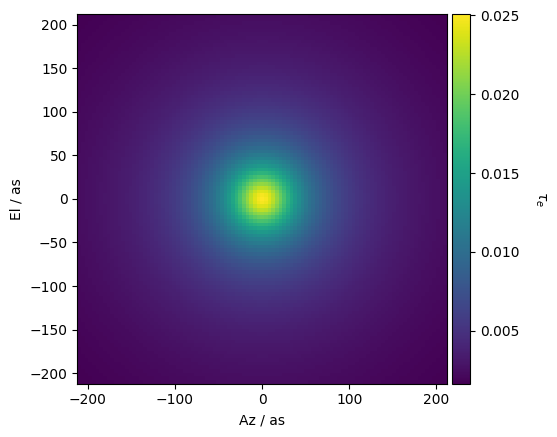

In [6]:
import MockSZ.Models as MModels
import MockSZ.Conversions as MConv

import numpy as np

import matplotlib.pyplot as pt
from mpl_toolkits.axes_grid1 import make_axes_locatable

simObjIso = MModels.IsoBetaModel()

%matplotlib inline

Te = 15.3
ne0 = 1e-2
thetac = 30
ibeta = 0.73
Da = 1500
v_pec = 700e3

numin = 220
numax = 440
n_nu = 1000

nu = np.linspace(numin, numax, num=n_nu) * 1e9

Az0 = -210
Az1 = 210
nAz = 101
Az = np.linspace(Az0, Az1, nAz)

El0 = -210
El1 = 210
nEl = 101
El = np.linspace(El0, El1, nEl)

isob = simObjIso.getIsoBeta(Az, El, ibeta, ne0, thetac, Da, grid=True)
gEl, gAz = np.meshgrid(Az, El)

fig, ax = pt.subplots(1,1)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)

tau_e = ax.pcolormesh(gAz, gEl, isob)

tau_ec = fig.colorbar(tau_e, cax=cax, orientation="vertical")
    
tau_ec.set_label(r"$\tau_e$", rotation=270, labelpad=20)
    
ax.set_aspect(1)
ax.set_xlabel(f"Az / as")
ax.set_ylabel(f"El / as")
pt.show()

We have now generated a 2D map giving the optical depth $\tau$ over the cluster. We can use the same ```simObj``` object, together with this map, to generate a datacube containing the tSZ + kSZ spectrum at each Az-El point. 

In [7]:
Te = 15.3
v_pec = 100

dataCube = MConv.SI_JySr(simObjIso.getIsoBetaCube(isob, nu, Te, v_pec, no_CMB=True)) * 1e-6

We can now investigate a few of these maps.

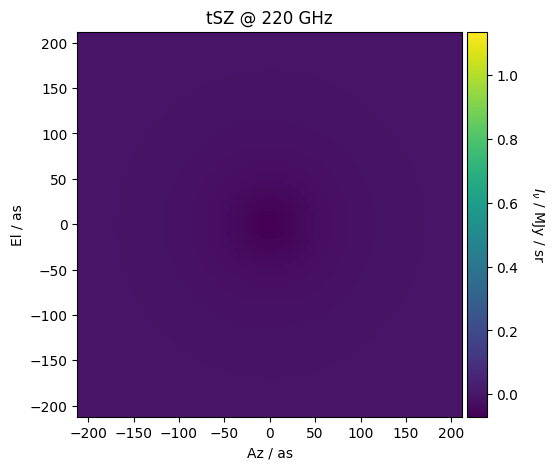

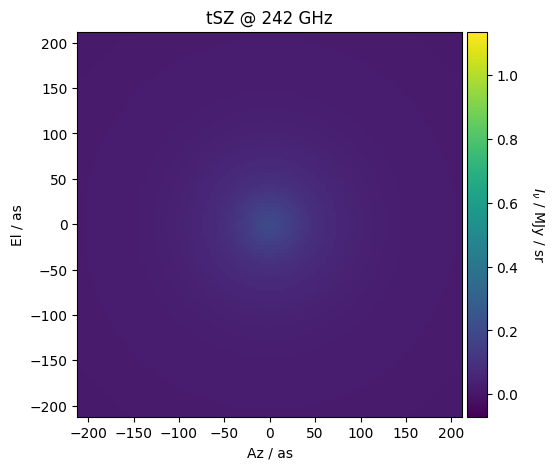

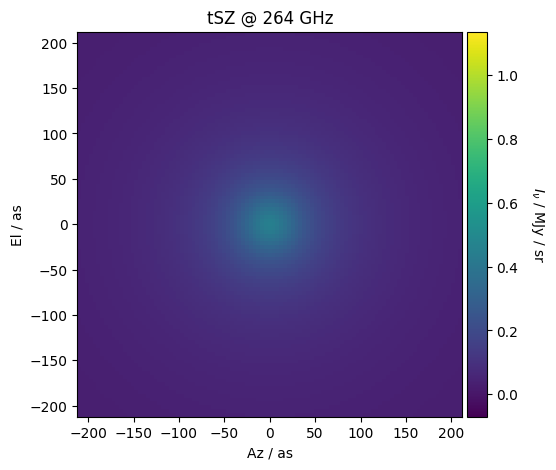

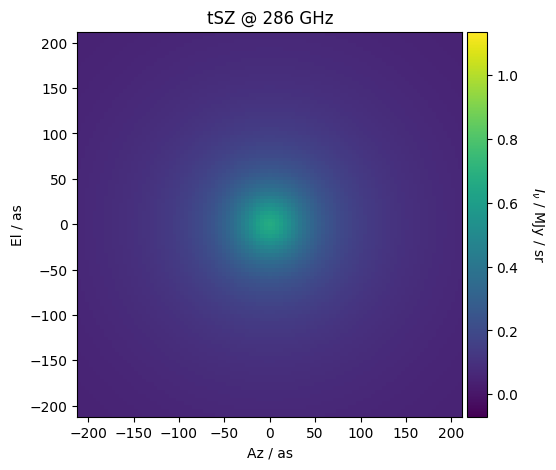

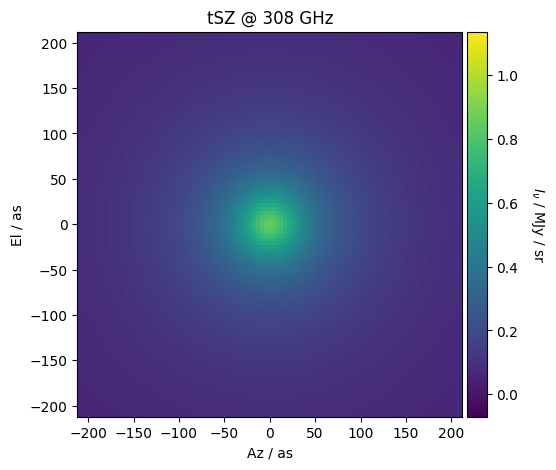

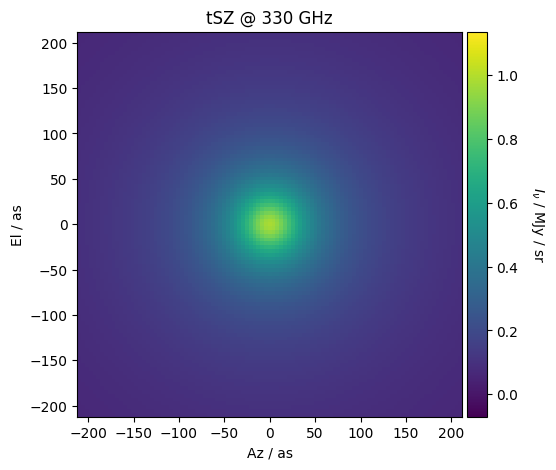

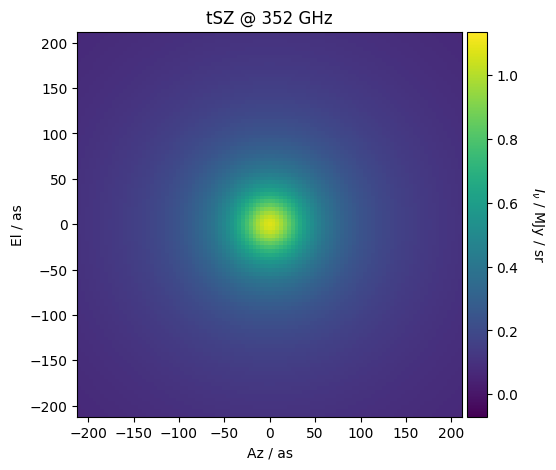

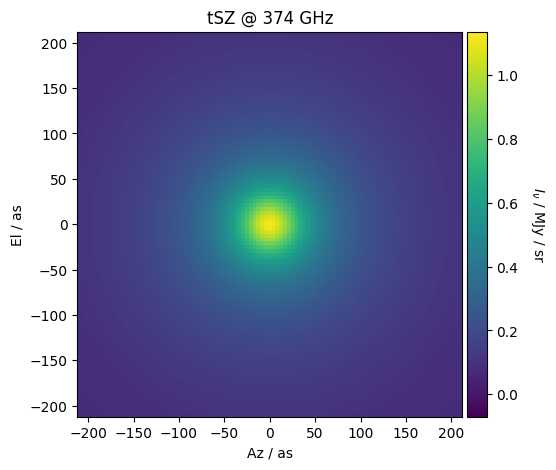

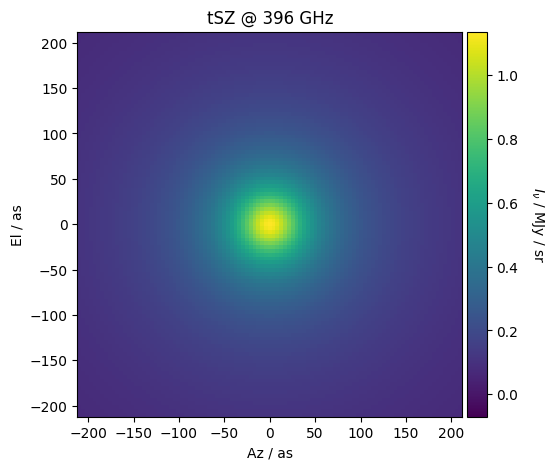

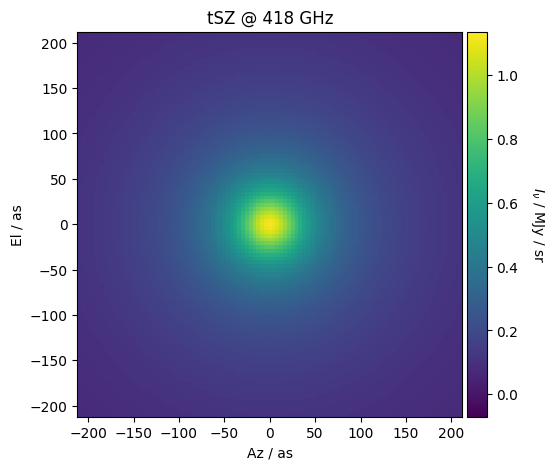

In [8]:
min_plot = np.min(dataCube)
max_plot = np.max(dataCube)

N = 10
step = int(n_nu / N)

for i in range(N):
    fig, ax = pt.subplots(1,1, figsize=(10,5), gridspec_kw={"wspace":0.6})
    
    SZ_fig = ax.pcolormesh(gAz, gEl, dataCube[:,:,i*step], vmin=min_plot, vmax=max_plot)
    
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    
    SZ_c = fig.colorbar(SZ_fig, cax=cax, orientation="vertical")
    
    SZ_c.set_label(r"$I_\nu$ / MJy / sr", rotation=270, labelpad=20)
    
    ax.set_aspect(1)
    
    ax.set_title(f"tSZ @ {nu[i*step]*1e-9:.0f} GHz")

    ax.set_xlabel(f"Az / as")
    ax.set_ylabel(f"El / as")
    pt.show()

It is clearly visible that the effect is almost absent at 220 GHz, as expected from the position of the null. After this frequency, the signal picks up in strength and increases up to the last plotted frequency at 418 GHz. After this, the effect drops down in intensity.